# Data Preparation and Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
# set seed for reproducibility
SEED = 20
np.random.seed(SEED)

In [3]:
# Loading Data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Replacing all 0 values with Null values
def replace_zero(df):
    df_nan=df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan
df_nan=replace_zero(df)

In [5]:
# Copy pasting functions from previous notebook
def find_median(frame,var):
    temp = frame[frame[var].notnull()]
    temp = frame[[var,'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

In [6]:
# Copy pasting functions from previous notebook
def replace_null(frame,var):
    median_df=find_median(frame,var)
    var_0=median_df[var].iloc[0]
    var_1=median_df[var].iloc[1]
    frame.loc[(frame['Outcome'] == 0) & (frame[var].isnull()), var] = var_0
    frame.loc[(frame['Outcome'] == 1) & (frame[var].isnull()), var] = var_1
    return frame[var].isnull().sum()

In [7]:
print(str(replace_null(df_nan,'Glucose'))+ ' Nulls for Glucose')
print(str(replace_null(df_nan,'SkinThickness'))+ ' Nulls for SkinThickness')
print(str(replace_null(df_nan,'Insulin'))+ ' Nulls for Insulin')
print(str(replace_null(df_nan,'BMI'))+ ' Nulls for BMI')
print(str(replace_null(df_nan,'BloodPressure'))+ ' Nulls for BloodPressure')
# We have successfully handled Nulls

0 Nulls for Glucose
0 Nulls for SkinThickness
0 Nulls for Insulin
0 Nulls for BMI
0 Nulls for BloodPressure


In [8]:
df_nan.isnull().sum()
# Just a confirmation
# Everything looks good

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# We need to scale our data for uniformity.
from sklearn.preprocessing import StandardScaler
def std_scalar(df):
    std_X = StandardScaler()
    x =  pd.DataFrame(std_X.fit_transform(df.drop(["Outcome"],axis = 1),),
            columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age'])
    y=df["Outcome"]
    return x,y


In [10]:
X,Y=std_scalar(df_nan)
X.describe()
# Scaled data looks fine

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,1.604619e-16,-3.685926e-16,-3.928426e-17,-8.601337e-18,1.054567e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.551447e+00,-3.999727e+00,-2.486187e+00,-1.434747e+00,-2.070186e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.202356e-01,-6.934382e-01,-4.603073e-01,-4.408430e-01,-7.176590e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.536274e-01,-3.218035e-02,-1.226607e-01,-4.408430e-01,-5.593870e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.100618e-01,6.290775e-01,3.275348e-01,3.116039e-01,6.057816e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.539814e+00,4.100681e+00,7.868309e+00,7.909072e+00,5.041489e+00,5.883565e+00,4.063716e+00


In [11]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
#Keeping train  size as 0.8
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20, stratify=Y)
models = ['KNN','Logistic Regression', 'SVM', 'Random Forest']
accuracy_score = []


In [13]:
# We are good to go with baseline model
# Let's first implement KNN
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(5,15):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_scores.append(neigh.score(X_train,Y_train))
    test_scores.append(neigh.score(X_test,Y_test))

In [14]:
print('Max train_scores is ' + str(max(train_scores)*100) + ' for k = '+ 
      str(train_scores.index(max(train_scores))+5))

Max train_scores is 85.66775244299674 for k = 5


In [15]:
print('Max test_scores is ' + str(max(test_scores)*100) + ' for k = '+ 
      str(test_scores.index(max(test_scores))+5))

# K=13 has generalized well for our data.

accuracy_score.append(0.8701298701298701)
accuracy_score

Max test_scores is 87.01298701298701 for k = 13


[0.8701298701298701]

In [16]:
# Lets try Logistic regression now
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=20, penalty='l2').fit(X_train, Y_train)
log_pred=log_model.predict(X_test)
print(log_model.score(X_test, Y_test))
accuracy_score.append(log_model.score(X_test,Y_test))

0.8311688311688312


In [17]:
# Support Vector Machines
from sklearn import svm
svm_model = svm.SVC().fit(X_train, Y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, Y_test)
# Almost 89% Accuracy

0.8896103896103896

In [18]:
accuracy_score.append(svm_model.score(X_test,Y_test))

In [19]:
# Function to evaluate model performance
def model_perf(pred,Y_test):
    cmp_list=[]
    for i,j in zip(pred,Y_test):
        if i==j:
            cmp_list.append(1)
        else:
            cmp_list.append(0)
    return cmp_list


In [20]:
cmp_list=model_perf(svm_pred,Y_test)

In [21]:
print('Model Accuracy Confirmation :'+ str(cmp_list.count(1)/len(Y_test)))

Model Accuracy Confirmation :0.8896103896103896


In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=20).fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
rf_model.score(X_test, Y_test)
# Almost 86% Accuracy


0.8571428571428571

In [23]:
accuracy_score.append(rf_model.score(X_test,Y_test))

In [24]:
import pickle
# Lets dump our SVM model
pickle.dump(svm_model, open('svm_model.pkl','wb'))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


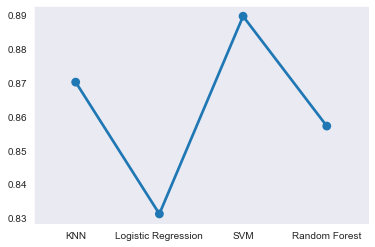

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')
sns.pointplot(models,accuracy_score)
plt.show()
# accuracy_score

In [32]:
accuracy_score

[0.8701298701298701,
 0.8311688311688312,
 0.8896103896103896,
 0.8571428571428571]